<a href="https://colab.research.google.com/github/mahsarahavi/TalentMind1/blob/main/talentmine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahsarahavi","key":"f7c63e48be9775b69d8826dbd9168563"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d alisharifi2000/talentmindphase1

 96% 89.0M/92.7M [00:03<00:00, 20.6MB/s]
100% 92.7M/92.7M [00:03<00:00, 24.9MB/s]


In [4]:
!ls

kaggle.json  sample_data  talentmindphase1.zip


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('talentmindphase1.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('/content/files/data.csv', lineterminator='\n')

In [7]:
data.shape

(268850, 49)

In [8]:
data.index.values

array([     0,      1,      2, ..., 268847, 268848, 268849])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    267350 non-null  object 
 1   serviceCharge             260476 non-null  float64
 2   heatingType               222731 non-null  object 
 3   telekomTvOffer            234894 non-null  object 
 4   telekomHybridUploadSpeed  44759 non-null   float64
 5   newlyConst                267350 non-null  object 
 6   balcony                   267350 non-null  object 
 7   picturecount              267350 non-null  float64
 8   pricetrend                265528 non-null  float64
 9   telekomUploadSpeed        234156 non-null  float64
 10  totalRent                 227042 non-null  float64
 11  yearConstructed           210610 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              92505 non-null   f

In [10]:
data.nunique()

regio1                          16
serviceCharge                12224
heatingType                     13
telekomTvOffer                   3
telekomHybridUploadSpeed         1
newlyConst                       2
balcony                          2
picturecount                    94
pricetrend                    1234
telekomUploadSpeed               7
totalRent                    29076
yearConstructed                464
scoutId                     268850
noParkSpaces                    71
firingTypes                    132
hasKitchen                       2
geo_bln                         16
cellar                           2
yearConstructedRange             9
baseRent                     26566
houseNumber                   5492
livingSpace                  12992
geo_krs                        419
condition                       10
interiorQual                     4
petsAllowed                      3
street                       52207
streetPlain                  54315
lift                

In [11]:
data.isnull().sum()

regio1                        1500
serviceCharge                 8374
heatingType                  46119
telekomTvOffer               33956
telekomHybridUploadSpeed    224091
newlyConst                    1500
balcony                       1500
picturecount                  1500
pricetrend                    3322
telekomUploadSpeed           34694
totalRent                    41808
yearConstructed              58240
scoutId                          0
noParkSpaces                176345
firingTypes                  58150
hasKitchen                    1500
geo_bln                       1500
cellar                        1500
yearConstructedRange         58240
baseRent                      1500
houseNumber                  72136
livingSpace                   1500
geo_krs                       1500
condition                    69584
interiorQual                113541
petsAllowed                 115448
street                        1500
streetPlain                  72131
lift                

In [12]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6.0,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8.0,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8.0,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9.0,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19.0,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [13]:
data.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,260476.000000,44759.0,267350.000000,265528.000000,234156.000000,2.270420e+05,210610.000000,2.688500e+05,92505.000000,210610.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85040.000000,80254.000000,46598.000000,46598.000000
mean,151.227205,10.0,9.791408,3.388936,28.804526,1.506015e+03,1966.397868,1.069697e+08,1.328836,3.714396,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,77.007268,2013.903868,89.108998,0.199781
std,309.093976,0.0,6.405894,1.965041,16.336632,3.436491e+04,46.984344,1.250093e+07,8.385641,2.738146,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,148.109332,10.973655,5.402656,0.009670
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.700000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1972.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.941675e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [14]:
data.describe(include="object")

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,firingTypes,hasKitchen,geo_bln,cellar,houseNumber,...,street,streetPlain,lift,typeOfFlat,regio2,regio3,description,facilities,energyEfficiencyClass,date
count,267350,222731,234894,267350,267350,210700,267350,267350,267350,196714,...,267350,196719,267350,230919,268850,268850,247708,214701,77352,268850
unique,16,13,3,2,2,132,2,16,2,5492,...,52207,54315,2,10,419,8684,211490,188513,10,4
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,True,gas,False,Nordrhein_Westfalen,True,1,...,no_information,Hauptstraße,False,apartment,Leipzig,Innenstadt,+ MEIN GUENTZ - Quartier der Generationen\r\n+...,Laminat,C,Feb20
freq,62492,128278,226335,246312,164807,110277,175775,62492,171255,7125,...,70631,905,204374,130759,13723,4751,216,207,14538,79276


**Drop features**

In [15]:
data.drop(data[data.livingSpace == 0].index, inplace=True)
data.drop(data[data.totalRent == 0].index, inplace=True)
data.drop(data[data.baseRent == 0].index, inplace=True)
data.drop(data[data.serviceCharge == 0].index, inplace=True)
data.drop(data[data.yearConstructed >= 2022].index, inplace=True)

In [16]:
#too null
data.drop(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts', 'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'street', 'condition'], axis=1, inplace = True)
#useless
data.drop(['regio2', 'regio3', 'noRoomsRange', 'baseRentRange', 'yearConstructedRange', 'livingSpaceRange', 'houseNumber', 'date', 'scoutId', 'geo_plz', 'description', 'facilities', 'interiorQual', 'streetPlain', 'picturecount', 'pricetrend'], axis=1, inplace = True)
#duplicate
data.drop(['geo_bln', 'geo_krs'], axis=1, inplace = True)

In [17]:
data = data.dropna(how='any', subset=['totalRent'])

**Fill String NaN**

In [18]:
data['typeOfFlat'].fillna('NO_INFORMATION', inplace = True)
data['telekomTvOffer'].fillna('NO_INFORMATION', inplace = True)
data['firingTypes'].fillna('no_information', inplace = True)
data['heatingType'].fillna('NO_INFORMATION', inplace = True)

**Remove Outliers**

In [19]:
def find_quartiles(data):
    data = sorted(data)
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    return lower_bound, upper_bound

In [20]:
for col in data.describe().columns:
  lowerbound, upperbound = find_quartiles(data[col])
  data.drop(data[ (data[col] > upperbound) | (data[col] < lowerbound) ].index , inplace=True)

**Fill Number NaN**

In [21]:
data['serviceCharge'].fillna(data['serviceCharge'].mean(), inplace = True)
data['yearConstructed'].fillna(data['yearConstructed'].mean(), inplace = True)
data['thermalChar'].fillna(data['thermalChar'].mean(), inplace = True)
data['telekomUploadSpeed'].fillna(data['telekomUploadSpeed'].mean(), inplace = True)
data['baseRent'].fillna(data['baseRent'].mean(), inplace = True)

In [22]:
data['balcony'].replace([False, True], [0,1], inplace = True)
data['garden'].replace([False, True], [0,1], inplace = True)
data['hasKitchen'].replace([False, True], [0,1], inplace = True)
data['cellar'].replace([False, True], [0,1], inplace = True)
data['lift'].replace([False, True], [0,1], inplace = True)
data['petsAllowed'].replace(['no', 'negotiable', 'yes'] ,[0, 0.5, 1],  inplace = True)
data['newlyConst'].replace([False, True], [0,1], inplace = True)

In [23]:
data['balcony'].fillna(data['balcony'].mode(), inplace = True)
data['garden'].fillna(data['garden'].mode(), inplace = True)
data['hasKitchen'].fillna(data['hasKitchen'].mode(), inplace = True)
data['cellar'].fillna(data['cellar'].mode(), inplace = True)
data['lift'].fillna(data['lift'].mode(), inplace = True)
data['petsAllowed'].fillna(data['petsAllowed'].mode()[0], inplace = True)
data['newlyConst'].fillna(data['petsAllowed'].mode(), inplace = True)

In [24]:
data['floor'].fillna(data['floor'].median(), inplace = True)
data['numberOfFloors'].fillna(data['numberOfFloors'].median(), inplace = True)

**Correct Datatypes**

In [25]:
data['noRooms'] = data['noRooms'].astype('int64')
data['numberOfFloors'] = data['numberOfFloors'].astype('int64')
data['yearConstructed'] = data['yearConstructed'].astype('int64')
data['floor'] = data['floor'].astype('int64')

In [26]:
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [27]:
data.reset_index(drop=True, inplace=True)

**Plots**

In [28]:
import matplotlib.pyplot as plt

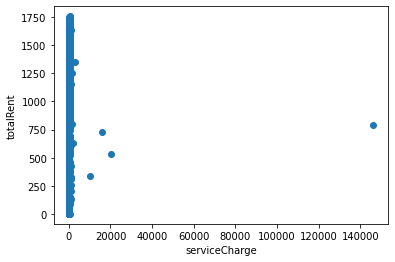

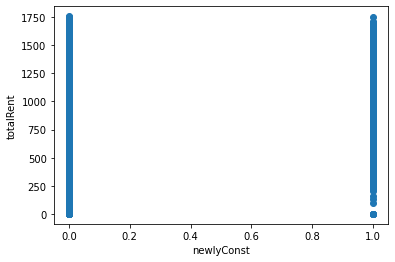

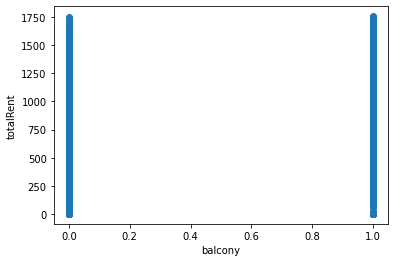

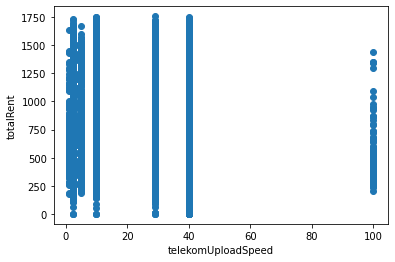

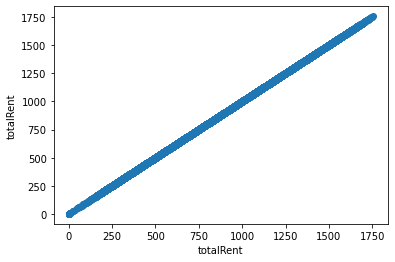

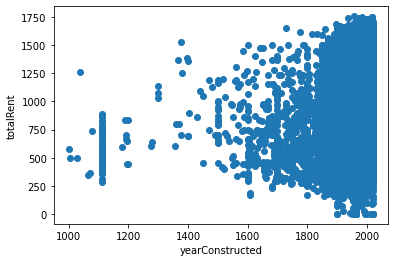

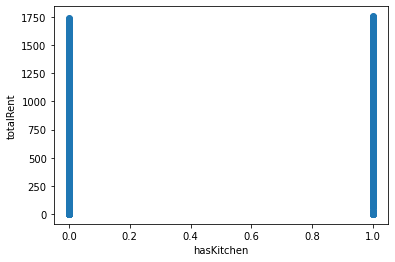

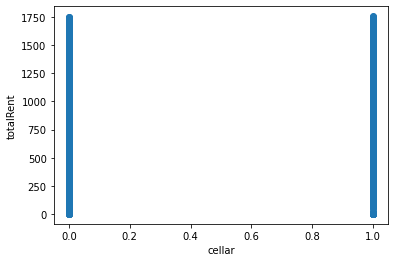

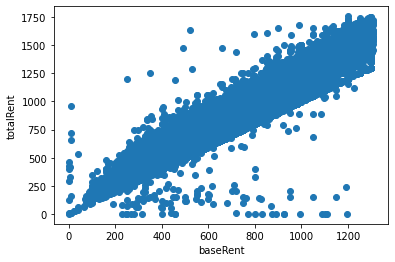

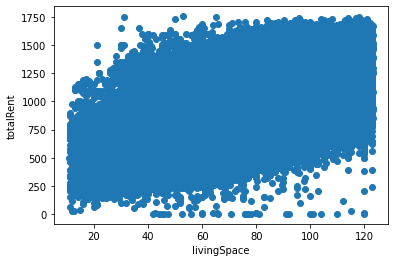

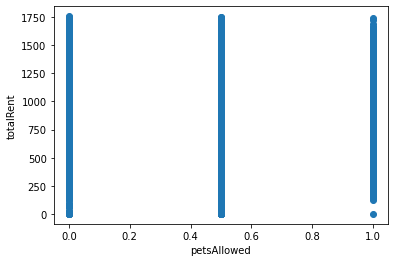

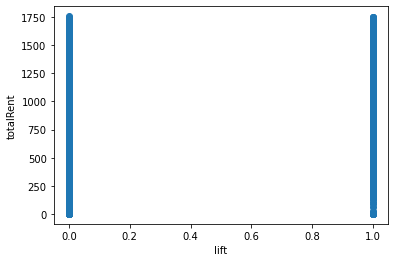

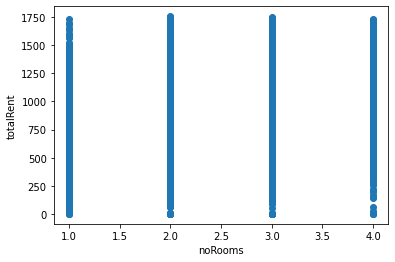

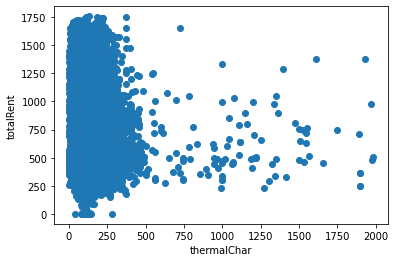

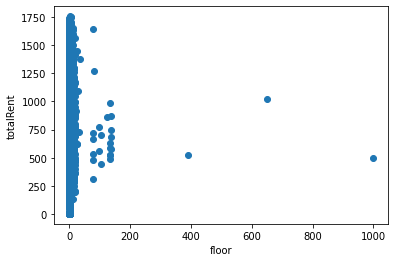

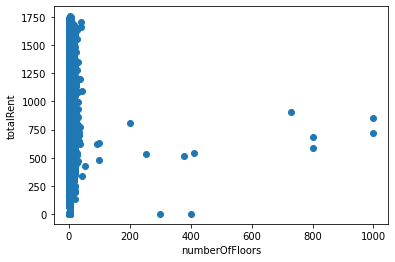

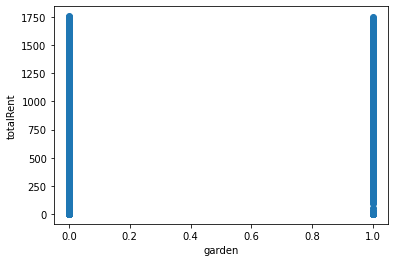

In [29]:
for col in data.describe().columns:
  X = data[col]
  Y = data['totalRent']
  plt.scatter(X,Y)
  plt.xlabel(col)
  plt.ylabel('totalRent')
  plt.show()

**Get Dummies**

In [30]:
d2 = pd.get_dummies(data['telekomTvOffer'])
d2 = d2.rename(columns={"NONE": "telekomTvOffer_NONE", "NO_INFORMATION": "telekomTvOffer_NO_INFORMATION", "ONE_YEAR_FREE": "telekomTvOffer_ONE_YEAR_FREE", "ON_DEMAND": "telekomTvOffer_ON_DEMAND"})
data = data.join(d2)
data.drop(["telekomTvOffer"], axis = 1, inplace = True)

In [31]:
data['firingTypes'].value_counts(normalize=True, sort=True)

gas                                            0.416123
no_information                                 0.209023
district_heating                               0.185064
oil                                            0.066123
natural_gas_light                              0.039816
                                                 ...   
natural_gas_light:wood                         0.000005
geothermal:solar_heating:pellet_heating:gas    0.000005
gas:oil:electricity                            0.000005
gas:heat_supply                                0.000005
pellet_heating:district_heating                0.000005
Name: firingTypes, Length: 107, dtype: float64

In [32]:
data.loc[(data['firingTypes'] != 'gas') & (data['firingTypes'] != 'no_information') & (data['firingTypes'] != 'district_heating'), 'firingTypes'] = 'other'

In [33]:
d2 = pd.get_dummies(data['firingTypes'])
d2 = d2.rename(columns={"district_heating": "firingTypes_district_heating", "gas": "firingTypes_gas", "no_information": "firingTypes_no_information", "other": "firingTypes_other"})
data = data.join(d2)
data.drop(["firingTypes"], axis = 1, inplace = True)

In [34]:
data['regio1'].value_counts(normalize=True, sort=True)

Sachsen                   0.240316
Nordrhein_Westfalen       0.234348
Sachsen_Anhalt            0.084979
Bayern                    0.066889
Niedersachsen             0.055697
Hessen                    0.055258
Baden_Württemberg         0.049905
Thüringen                 0.035244
Berlin                    0.034179
Brandenburg               0.030207
Mecklenburg_Vorpommern    0.028805
Rheinland_Pfalz           0.028547
Schleswig_Holstein        0.027404
Bremen                    0.011905
Hamburg                   0.011672
Saarland                  0.004644
Name: regio1, dtype: float64

In [35]:
data.loc[(data['regio1'] != 'Sachsen') & (data['regio1'] != 'Nordrhein_Westfalen'), 'regio1'] = 'other'

In [36]:
d2 = pd.get_dummies(data['regio1'])
d2 = d2.rename(columns={"Sachsen": "regio1_Sachsen", "Nordrhein_Westfalen": "regio1_Nordrhein_Westfalen", "other": "regio1_other"})
data = data.join(d2)
data.drop(["regio1"], axis = 1, inplace = True)

In [37]:
data['heatingType'].value_counts(normalize=True, sort=True)

central_heating                   0.497290
NO_INFORMATION                    0.156320
district_heating                  0.094029
gas_heating                       0.080836
self_contained_central_heating    0.066413
floor_heating                     0.054725
oil_heating                       0.020040
heat_pump                         0.008781
combined_heat_and_power_plant     0.007359
night_storage_heater              0.005544
wood_pellet_heating               0.003563
electric_heating                  0.003408
stove_heating                     0.001148
solar_heating                     0.000543
Name: heatingType, dtype: float64

In [38]:
data.loc[(data['heatingType'] != 'central_heating') & (data['heatingType'] != 'NO_INFORMATION'), 'heatingType'] = 'other'

In [39]:
d2 = pd.get_dummies(data['heatingType'])
d2 = d2.rename(columns={"central_heating": "heatingType_central_heating", "NO_INFORMATION": "heatingType_NO_INFORMATION", "other": "heatingType_other"})
data = data.join(d2)
data.drop(["heatingType"], axis = 1, inplace = True)

In [40]:
data['typeOfFlat'].value_counts(normalize=True, sort=True)

apartment              0.498335
roof_storey            0.135432
NO_INFORMATION         0.132376
ground_floor           0.121267
other                  0.037706
maisonette             0.024467
raised_ground_floor    0.023003
terraced_flat          0.011031
half_basement          0.008285
penthouse              0.005818
loft                   0.002281
Name: typeOfFlat, dtype: float64

In [41]:
data.loc[(data['typeOfFlat'] != 'apartment') & (data['typeOfFlat'] != 'roof_storey') & (data['typeOfFlat'] != 'NO_INFORMATION'), 'typeOfFlat'] = 'other'

In [42]:
d2 = pd.get_dummies(data['typeOfFlat'])
d2 = d2.rename(columns={"apartment": "typeOfFlat_apartment", "roof_storey": "typeOfFlat_roof_storey", "NO_INFORMATION": "typeOfFlat_NO_INFORMATION", "other": "typeOfFlat_other"})
data = data.join(d2)
data.drop(["typeOfFlat"], axis = 1, inplace = True)

# **Making Models**

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
# example of increase in mean squared error

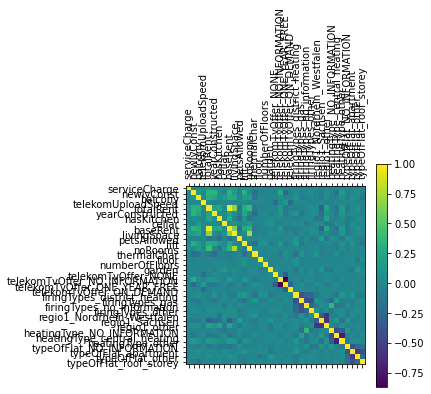

In [44]:
plt.matshow(data.corr())
plt.xticks(np.arange(35), data.columns, rotation=90)
plt.yticks(np.arange(35), data.columns, rotation=0)
plt.colorbar()
plt.show()

In [45]:
data.corr() > 0.2

,serviceCharge,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,...,regio1_Nordrhein_Westfalen,regio1_Sachsen,regio1_other,heatingType_NO_INFORMATION,heatingType_central_heating,heatingType_other,typeOfFlat_NO_INFORMATION,typeOfFlat_apartment,typeOfFlat_other,typeOfFlat_roof_storey
serviceCharge,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
newlyConst,False,True,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
balcony,False,False,True,False,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
telekomUploadSpeed,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
totalRent,False,True,True,False,True,True,True,False,True,True,...,False,False,True,False,False,False,False,False,False,False
yearConstructed,False,True,True,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
hasKitchen,False,False,False,False,True,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
cellar,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
baseRent,False,True,True,False,True,True,True,False,True,True,...,False,False,True,False,False,False,False,False,False,False
livingSpace,False,False,True,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [46]:
lm = LinearRegression()

In [47]:
X = np.asarray(data[['baseRent', 'livingSpace', 'noRooms', 'balcony', 'yearConstructed', 'hasKitchen', 'lift', 'regio1_other']])
Y = np.asarray(data['totalRent'])

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train.reshape(-1,1))
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test.reshape(-1,1))

In [50]:
lm.fit(X_train, Y_train)

LinearRegression()

In [51]:
Yhat = lm.predict(X_test)
Yhat[0:5]

array([[ 0.39949106],
       [-0.76763223],
       [-0.23543445],
       [ 0.38371186],
       [ 2.38930477]])

In [52]:
errors = mean_squared_error(Y_test, Yhat)

In [53]:
errors

0.02808401970085717

In [54]:
score = lm.score(X_test, Y_test)

In [55]:
score

0.9719159802991428

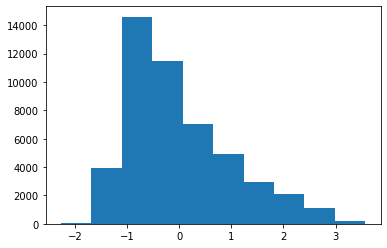

In [56]:
plt.hist(Y_test)
plt.show()